Setup Kaggle api and Download Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manavbvijayan","key":"eba4d0fe2ebf8d73597a5334e6683ad7"}'}

In [3]:
!mkdir -p ~/.kaggle  # created a .kaggle directory
!mv kaggle.json ~/.kaggle/ # moves the json file to created dir
!chmod 600 ~/.kaggle/kaggle.json # giving permission

In [4]:
# Download and unzip the dataset
!kaggle datasets download -d jessicali9530/celeba-dataset --force
!unzip celeba-dataset.zip -d celeba-dataset

Streaming output truncated to the last 5000 lines.
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba-dataset/img_align_celeba/img_

Load Dataset into the enviroment

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [5]:
celebA_csv_path = '/content/celeba-dataset/list_attr_celeba.csv' # path to csv file contain attribute label for each image
celebA_data = pd.read_csv(celebA_csv_path)
celebA_data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [7]:
# basic info about the dataset
celebA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

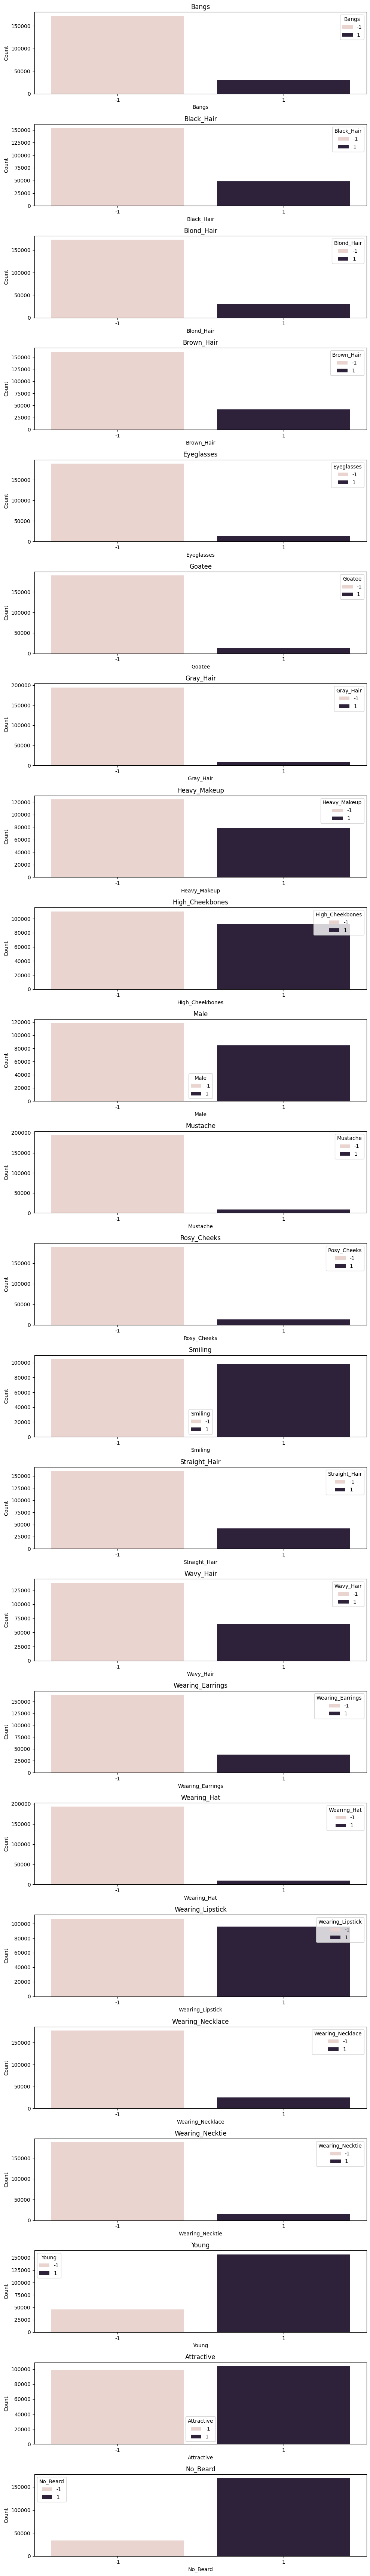

In [8]:
relevant_features = ['Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee',
                     'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
                     'Rosy_Cheeks', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
                     'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
                     'Young', 'Attractive', 'No_Beard'] # relevant feature for finding fashion from face attirubutes

fig, axes = plt.subplots(nrows=len(relevant_features), figsize=(10, len(relevant_features)*3))


for i, feature in enumerate(relevant_features):
  sns.countplot(ax=axes[i], x=feature, hue=feature, data=celebA_data)
  axes[i].set_title(feature)  # Set title for each subplot
  axes[i].set_xlabel(feature)  # Set x-axis label (can be feature name itself)
  axes[i].set_ylabel('Count')  # Set y-axis label

# Adjust layout (optional)
plt.tight_layout()

# Display the figure
plt.show()

* from this we can see the most of the features are imbalenced this may cause the bias

In [6]:
# To reduce the imbalence in the data, fouced on important features and try to minmize the imbalance

relevant_features = ['Wearing_Necktie', 'Goatee', 'Wearing_Hat','Eyeglasses','Gray_Hair','Mustache','Rosy_Cheeks'] # Imbalanced important feature for fashion analyis for facial attribute

sample_celebA = pd.DataFrame() # Create an empty DataFrame to store the sample
for feature in relevant_features:
    value_counts = celebA_data[feature].value_counts()
    min_count_minus_1 = value_counts.get(-1, 0)
    min_count_1 = value_counts.get(1, 0)
    min_count = min(min_count_minus_1, min_count_1)     # Determine the overall minimum count across both classes
    sample_minus_1 = celebA_data[celebA_data[feature] == -1].sample(min_count, replace=True)     # Sample instances for class -1
    sample_1 = celebA_data[celebA_data[feature] == 1].sample(min_count, replace=True)     # Sample instances for class 1
    sample = pd.concat([sample_minus_1, sample_1], ignore_index=True)     # Concatenate the samples for both classes
    sample_celebA = pd.concat([sample_celebA, sample], ignore_index=True)    # Append the sample to the final sample DataFrame
sample_celebA.drop_duplicates(inplace=True) # Remove duplicate images
sample_celebA = sample_celebA.sample(frac=1).reset_index(drop=True) # Shuffle the final sample


In [7]:
sample_celebA.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,162909.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,-1,-1
1,062450.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,081771.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,197205.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
4,154164.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,1


In [8]:
sample_celebA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96475 entries, 0 to 96474
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             96475 non-null  object
 1   5_o_Clock_Shadow     96475 non-null  int64 
 2   Arched_Eyebrows      96475 non-null  int64 
 3   Attractive           96475 non-null  int64 
 4   Bags_Under_Eyes      96475 non-null  int64 
 5   Bald                 96475 non-null  int64 
 6   Bangs                96475 non-null  int64 
 7   Big_Lips             96475 non-null  int64 
 8   Big_Nose             96475 non-null  int64 
 9   Black_Hair           96475 non-null  int64 
 10  Blond_Hair           96475 non-null  int64 
 11  Blurry               96475 non-null  int64 
 12  Brown_Hair           96475 non-null  int64 
 13  Bushy_Eyebrows       96475 non-null  int64 
 14  Chubby               96475 non-null  int64 
 15  Double_Chin          96475 non-null  int64 
 16  Eyeg

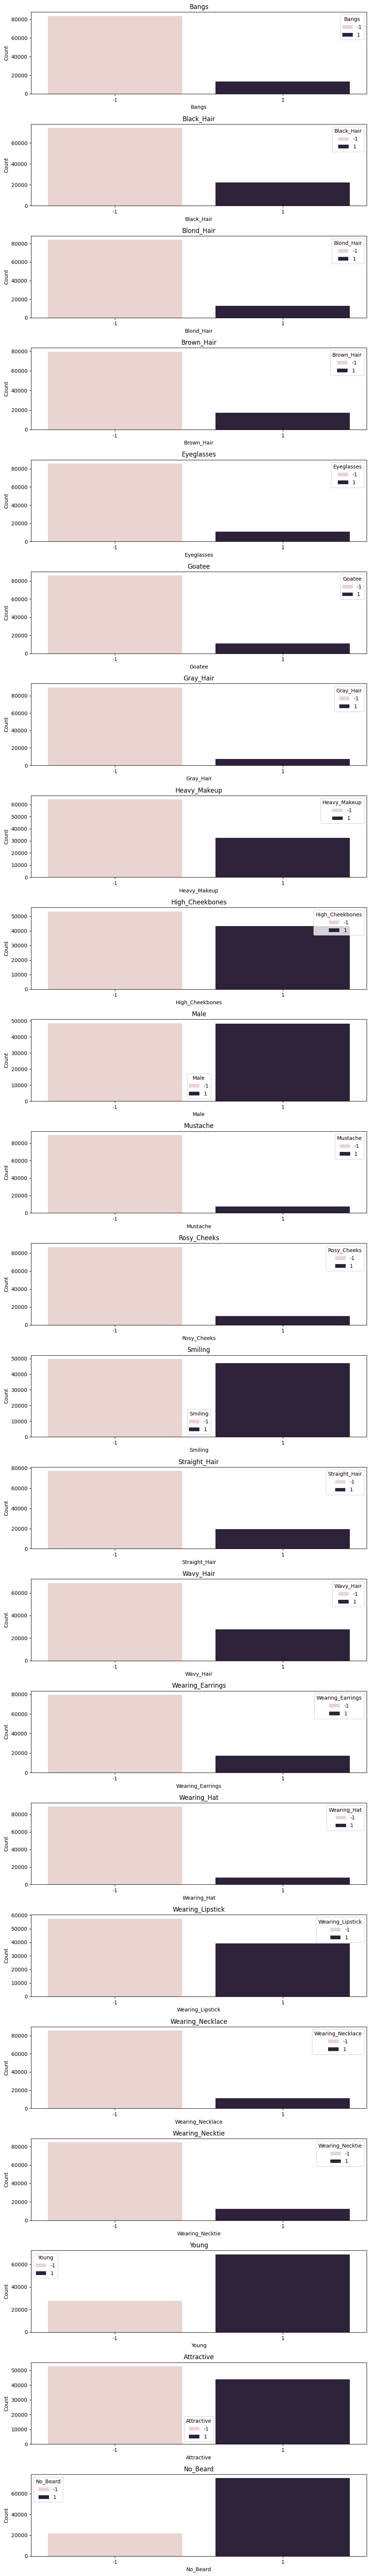

In [12]:
relevant_features = ['Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee',
                     'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
                     'Rosy_Cheeks', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
                     'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
                     'Young', 'Attractive', 'No_Beard'] # relevant feature for finding fashion from face attirubutes

fig, axes = plt.subplots(nrows=len(relevant_features), figsize=(10, len(relevant_features)*3))

for i, feature in enumerate(relevant_features):
  sns.countplot(ax=axes[i], x=feature, hue=feature, data=sample_celebA)
  axes[i].set_title(feature)
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Count')

plt.tight_layout()# Adjust layout (optional)
plt.show() # Display the figure

* We minimize the entire dataset into having 96688 without losing the importantce and reduced the imbalance in the data

In [9]:
# we only need the relavance features for our analysis so other than relavance features we can drop
relevant_features = ['image_id','Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee',
                     'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
                     'Rosy_Cheeks', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
                     'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
                     'Young', 'Attractive', 'No_Beard']
sample_celebA = sample_celebA[relevant_features]
sample_celebA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96475 entries, 0 to 96474
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          96475 non-null  object
 1   Bangs             96475 non-null  int64 
 2   Black_Hair        96475 non-null  int64 
 3   Blond_Hair        96475 non-null  int64 
 4   Brown_Hair        96475 non-null  int64 
 5   Eyeglasses        96475 non-null  int64 
 6   Goatee            96475 non-null  int64 
 7   Gray_Hair         96475 non-null  int64 
 8   Heavy_Makeup      96475 non-null  int64 
 9   High_Cheekbones   96475 non-null  int64 
 10  Male              96475 non-null  int64 
 11  Mustache          96475 non-null  int64 
 12  Rosy_Cheeks       96475 non-null  int64 
 13  Smiling           96475 non-null  int64 
 14  Straight_Hair     96475 non-null  int64 
 15  Wavy_Hair         96475 non-null  int64 
 16  Wearing_Earrings  96475 non-null  int64 
 17  Wearing_Hat 

In [10]:
def map_to_fashion_mnist(row):
    # Criteria for Men Casual
    if ((row['Male'] == 1 and row['Eyeglasses'] == -1 and row['Wearing_Necktie'] == -1 and
        row['Heavy_Makeup'] == -1 and row['Young'] == 1 and row['Gray_Hair'] == -1 and
        row['Wavy_Hair'] == -1) or
        (row['Male'] == 1 and row['Young'] == 1) or
        (row['Male'] == 1 and row['Smiling'] == 1 and row['Attractive'] == 1)):
        return 'Young Male Casual'

    if ((row['Male'] == 1 and row['Eyeglasses'] == -1 and row['Wearing_Necktie'] == -1 and
        row['Heavy_Makeup'] == -1 and row['Young'] == -1) or
        (row['Male'] == 1 and row['Young'] == -1) or
        (row['Male'] == 1 and row['Smiling'] == 1 and row['Attractive'] == 1)):
        return 'Old Male Casual'

    # Criteria for Women Casual
    if ((row['Male'] == -1 and row['Wearing_Earrings'] == -1 and row['Wearing_Lipstick'] == -1 and
        row['Wearing_Hat'] == -1 and row['Wearing_Necklace'] == -1 and row['Heavy_Makeup'] == -1 and
        row['Young'] == 1 and row['Gray_Hair'] == -1 and row['Wavy_Hair'] == -1) or
        (row['Male'] == -1 and row['Young'] == 1) or
        (row['Male'] == -1 and row['Smiling'] == 1 and row['Attractive'] == 1)):
        return 'Young Female Casual'

    if ((row['Male'] == -1 and row['Wearing_Earrings'] == -1 and row['Wearing_Lipstick'] == -1 and
        row['Wearing_Hat'] == -1 and row['Wearing_Necklace'] == -1 and row['Heavy_Makeup'] == -1 and
        row['Young'] == -1) or
        (row['Male'] == -1 and row['Young'] == -1) or
        (row['Male'] == -1 and row['Smiling'] == 1 and row['Attractive'] == 1)):
        return 'Old Female Casual'

    # Criteria for Men Formal
    if (row['Male'] == 1 and row['Eyeglasses'] == 1 and row['Wearing_Necktie'] == 1 and
        row['Heavy_Makeup'] == -1 and row['Gray_Hair'] == -1):
        return 'Young Male Formal'

    if (row['Male'] == 1 and row['Eyeglasses'] == 1 and row['Wearing_Necktie'] == 1 and
        row['Heavy_Makeup'] == -1 and row['Gray_Hair'] == 1):
        return 'Old Male Formal'

    # Criteria for Women Formal
    if (row['Male'] == -1 and row['Wearing_Earrings'] == 1 and row['Wearing_Lipstick'] == 1 and
        row['Wearing_Hat'] == -1 and row['Wearing_Necklace'] == -1 and row['Heavy_Makeup'] == -1 and
        row['Young'] == 1 and row['Gray_Hair'] == -1 and row['Wavy_Hair'] == -1):
        return 'Young Female Formal'

    if (row['Male'] == -1 and row['Wearing_Earrings'] == 1 and row['Wearing_Lipstick'] == 1 and
        row['Wearing_Hat'] == -1 and row['Wearing_Necklace'] == -1 and row['Heavy_Makeup'] == -1 and
        row['Young'] == -1):
        return 'Old Female Formal'
    return 'Unknown'

# Apply mapping function to each row
sample_celebA['Fashion_MNIST_Label'] = sample_celebA.apply(map_to_fashion_mnist, axis=1)


In [18]:
sample_celebA.head()

,image_id,Bangs,Black_Hair,Blond_Hair,Brown_Hair,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,...,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Attractive,No_Beard,Fashion_MNIST_Label
0,001645.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,1,1,-1,1,-1,-1,1,1,1,Young Female Casual
1,188419.jpg,1,-1,-1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,1,-1,1,Young Female Casual
2,119684.jpg,-1,1,-1,-1,-1,-1,-1,1,1,...,-1,-1,-1,1,1,-1,1,1,1,Young Female Casual
3,146969.jpg,-1,-1,-1,1,-1,-1,-1,1,1,...,-1,1,-1,1,-1,-1,1,1,1,Young Female Casual
4,100165.jpg,1,-1,-1,1,-1,-1,-1,1,1,...,-1,1,-1,1,1,-1,-1,-1,1,Old Female Casual


In [19]:
sample_celebA['Fashion_MNIST_Label'].value_counts() # Count of each categories

Fashion_MNIST_Label
Young Female Casual    43341
Young Male Casual      27866
Old Male Casual        20327
Old Female Casual       5105
Name: count, dtype: int64

FashionMNIST Dataset

In [22]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [23]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

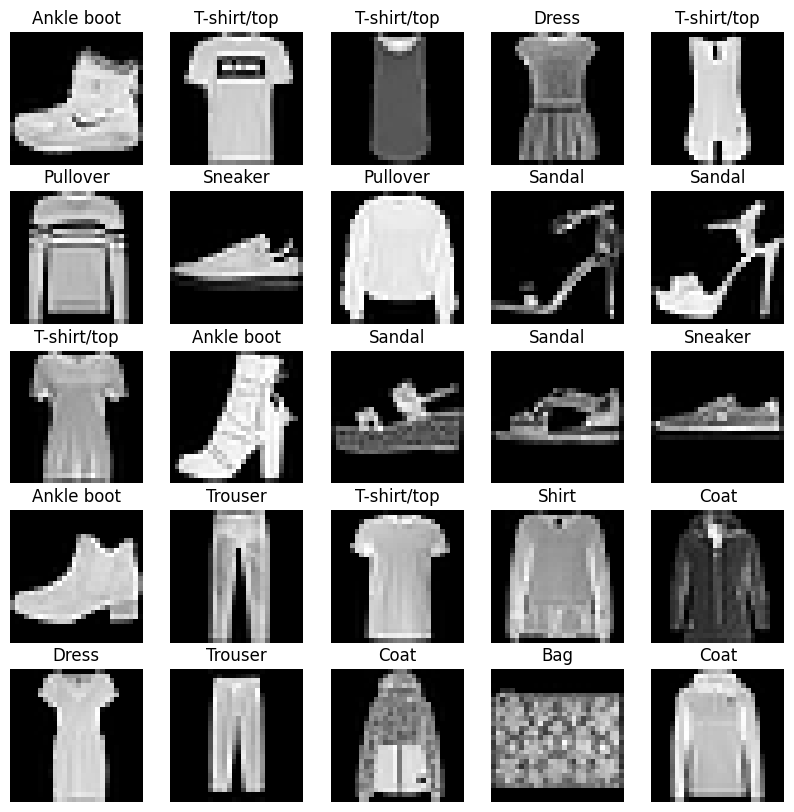

In [25]:
# Plot sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [11]:
def recommend_outfit(fashion_category):
    outfit_mapping = {
        'Young Male Casual': ['Pullover', 'Trouser', 'Sneaker'],
        'Old Male Casual': ['T-shirt/top', 'Trouser', 'Sneaker'],
        'Young Female Casual': ['T-shirt/top', 'Trouser', 'Sneaker'],
        'Old Female Casual': ['Dress', 'Sandal'],
        'Young Male Formal': ['Shirt', 'Trouser', 'Ankle boot'],
        'Old Male Formal': ['Shirt', 'Trouser', 'Ankle boot'],
        'Young Female Formal': ['Dress', 'Sandal', 'bag'],
        'Old Female Formal': ['Dress', 'Sandal', 'bag'],
        'Unknown': ['Shirt','Trouser']
    }
    return outfit_mapping.get(fashion_category, [])  # Return corresponding outfit

# Apply the recommend_outfit function to the 'Fashion_MNIST_Label' column
sample_celebA['Recommended_Outfit'] = sample_celebA['Fashion_MNIST_Label'].apply(recommend_outfit)

In [12]:
sample_celebA.tail()

,image_id,Bangs,Black_Hair,Blond_Hair,Brown_Hair,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,...,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Attractive,No_Beard,Fashion_MNIST_Label,Recommended_Outfit
96470,053699.jpg,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,1,1,1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
96471,167454.jpg,-1,-1,-1,-1,-1,-1,1,-1,1,...,-1,-1,-1,-1,1,-1,-1,1,Old Male Casual,"[T-shirt/top, Trouser, Sneaker]"
96472,168923.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
96473,199964.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,1,1,Young Female Casual,"[T-shirt/top, Trouser, Sneaker]"
96474,169271.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,1,1,1,Young Female Casual,"[T-shirt/top, Trouser, Sneaker]"


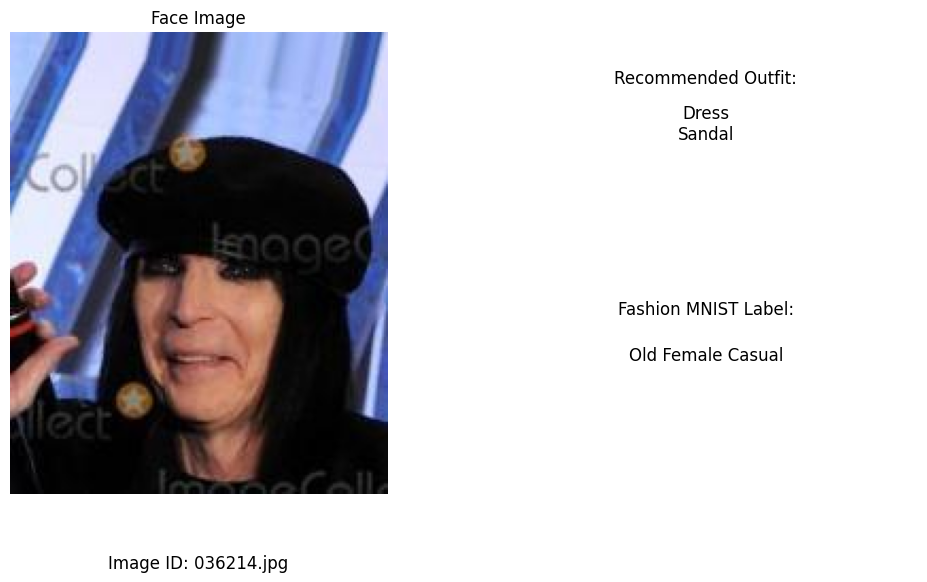

In [41]:
def display_outfit(image_id, df):
    # Construct the image path
    image_path = os.path.join('/content/celeba-dataset/img_align_celeba/img_align_celeba/', image_id)

    # Load and display the image of the face
    face_image = plt.imread(image_path)
    plt.figure(figsize=(12, 6))

    # Plot the face image
    plt.subplot(1, 2, 1)
    plt.imshow(face_image)
    plt.title('Face Image')
    plt.axis('off')

    # Print the image ID below the image
    plt.text(0.5, -0.15, f'Image ID: {image_id}', ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

    # Get the row corresponding to the image ID
    row = df[df['image_id'] == image_id]

    # Get the recommended outfit and fashion label from the dataframe
    recommended_outfit = row['Recommended_Outfit'].values[0]
    fashion_label = row['Fashion_MNIST_Label'].values[0]

    # Plot the recommended outfit and fashion label
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.9, 'Recommended Outfit:', ha='center', va='center', fontsize=12)
    plt.text(0.5, 0.8, '\n'.join(recommended_outfit), ha='center', va='center', fontsize=12)
    plt.text(0.5, 0.4, 'Fashion MNIST Label:', ha='center', va='center', fontsize=12)
    plt.text(0.5, 0.3, fashion_label, ha='center', va='center', fontsize=12)
    plt.axis('off')

    plt.show()

image_id = '036214.jpg'  # image ID

# Display the image of the face along with the recommended outfit
display_outfit(image_id, sample_celebA)

In [42]:
# Open a text file for writing
with open('outfit_recommendations.txt', 'w') as f:
    # Loop through each image and write the results to the file
    for image_id in sample_celebA['image_id']:
        f.write(f"Image ID: {image_id}\n")

        # Get the row corresponding to the image ID
        row = sample_celebA[sample_celebA['image_id'] == image_id]

        # Get the recommended outfit and fashion label from the dataframe
        recommended_outfit = row['Recommended_Outfit'].values[0]
        fashion_label = row['Fashion_MNIST_Label'].values[0]

        # Write the results to the file
        f.write(f"Fashion MNIST Label: {fashion_label}\n")
        f.write("Recommended Outfit:\n")
        f.write('\n'.join(recommended_outfit))
        f.write("\n\n")


# CNN Model

In [13]:
# importing libries that needed
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [14]:
# Loading the data
data = sample_celebA[['image_id', 'Fashion_MNIST_Label']]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96639 entries, 0 to 96638
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             96639 non-null  object
 1   Fashion_MNIST_Label  96639 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [15]:
# Convert Fashion_MNIST_Label to numerical labels
label_encoder = LabelEncoder()
data['Fashion_MNIST_Label'] = label_encoder.fit_transform(data['Fashion_MNIST_Label'])

<ipython-input-15-77848bb95326>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fashion_MNIST_Label'] = label_encoder.fit_transform(data['Fashion_MNIST_Label'])


In [16]:
# data after encoding
data.head()

,image_id,Fashion_MNIST_Label
0,162909.jpg,0
1,062450.jpg,1
2,081771.jpg,3
3,197205.jpg,2
4,154164.jpg,2


In [ ]:
# function to load image
def load_image(image_id):
    image_path = os.path.join('/content/celeba-dataset/img_align_celeba/img_align_celeba/', image_id)
    image = load_img(image_path, target_size=(224, 224)) # adjusting size of image
    image_array = img_to_array(image)
    return image_array

# Load images and preprocess them
X_images = np.array([load_image(image_id) for image_id in data['image_id']])
y_labels = data['Fashion_MNIST_Label'].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_images, y_labels, test_size=0.2, random_state=42)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predicted numerical labels back into their original format
predicted_labels = label_encoder.inverse_transform(predictions)

# Print the predicted labels
print('Predicted labels:', predicted_labels)